In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TVector3, TLorentzVector
import math, os
from helpers import addCorrM, addVars, prepPlot, addProb, scanPoint, FoM

topo = 'DD'

varsCaloChosen = ['calog_ShowerShape', 'calog_LOKI_CaloNeutralE49'
         , 'calog_LOKI_CaloNeutralPrsM', 'calog_LOKI_CaloNeutralSpd'
         , 'calog_LOKI_IsPhoton']
varsConvChosen = [
    'photon_conv_PT', 'photon_conv_MMERR'
    , 'photon_conv_LOKI_ENDVERTEX_CHI2DOF', 'pos_LOKI_CaloEcalE'
]
varsConvLLChosen = ['photon_conv_LOKI_BPVIP']

load_folder = '/Users/sbenson/Documents/STBC-Drive/sbenson/BsGammaGamma/offline_training_keras/'
bkg = 'Data_%s_16_9.h5' % topo
sig = 'Data_%s_16_MC.h5' % topo

df_bkg = pd.read_hdf(load_folder+bkg)
df_sig = pd.read_hdf(load_folder+sig)
print(len(df_sig))
varsCaloChosen = ['calog_ShowerShape', 'calog_LOKI_CaloNeutralE49'
         , 'calog_LOKI_CaloNeutralPrsM', 'calog_LOKI_CaloNeutralSpd'
         , 'calog_LOKI_IsPhoton']
varsCaloChosen = [v.replace('calog','photon') for v in varsCaloChosen]
varsConvChosen = [
    'photon_conv_PT', 'photon_conv_MMERR'
    , 'photon_conv_LOKI_ENDVERTEX_CHI2DOF', 'pos_LOKI_CaloEcalE', 'ele_LOKI_CaloEcalE'
]
varsConvLLChosen = ['photon_conv_LOKI_BPVIP']

# Do identical things with the labels
labCaloChosen = ['photon ShowerShape', 'photon E49'
         , 'photon PRSM', 'photon CaloNeutralSpd'
         , 'photon IsPhoton']
labConvChosen = [
    'Conv. photon $p_{T}$ [$MeV/c$]', 'Conv. photon MMERR'
    , 'Conv. photon vertex $\chi^{2}/DOF$', '$e^{+}$ ECAL E [$MeV$]', '$e^{-}$ ECAL E [$MeV$]'
]
labConvLLChosen = ['Conv. photon IP WRT PV']

if topo =='LL':
    vars_for_training = varsCaloChosen + varsConvChosen + varsConvLLChosen
    labels = labCaloChosen + labConvChosen + labConvLLChosen
elif topo == 'DD':
    vars_for_training = varsCaloChosen + varsConvChosen
    labels = labCaloChosen + labConvChosen
else:
    vars_for_training = [v.replace('photon','photon1') for v in varsCaloChosen]
    vars_for_training += [v.replace('photon','photon2') for v in varsCaloChosen]
    labels = [v.replace('photon','photon1') for v in labCaloChosen]
    labels += [v.replace('photon','photon2') for v in labCaloChosen]

3491


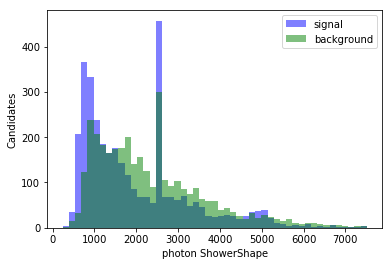

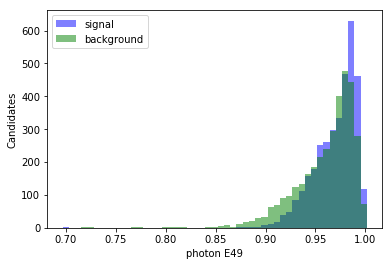

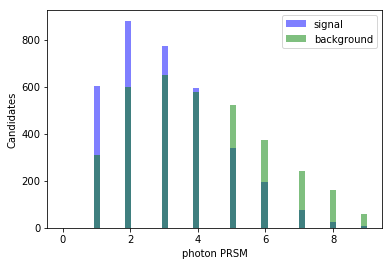

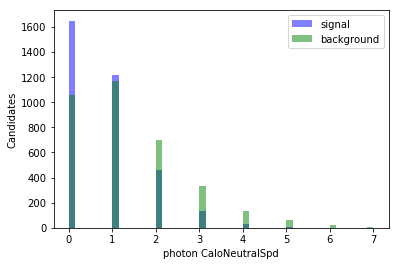

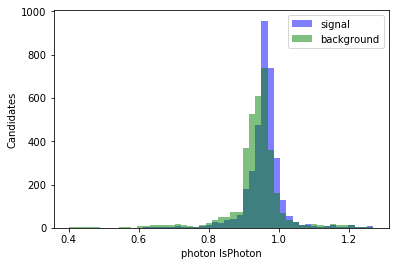

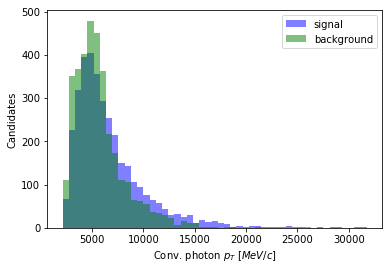

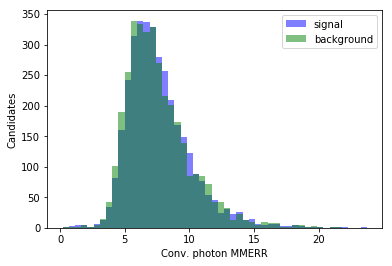

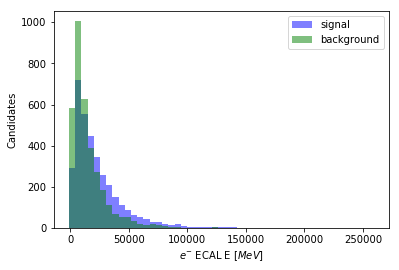

In [2]:
# Plot the inputs
# first remove annoying 1 event
if topo=="LL":
    df_sig = df_sig[(df_sig["photon_conv_LOKI_ENDVERTEX_CHI2DOF"]<7.5)]
for m, l in zip(vars_for_training, labels):
    bins = np.linspace(min(df_sig[m]),max(df_sig[m]),50)
    fig, axes = plt.subplots()
    df_sig.hist(column=[m], ax=axes, fill=True, color = 'blue', bins = bins, alpha=0.5, label="signal")
    df_bkg.sample(len(df_sig)).hist(column=[m], ax=axes, fill=True, color = 'green', bins = bins, alpha=0.5, label="background")
    prepPlot(axes, l, "Candidates")
    plt.legend()
    plt.savefig("input_%s_%s.pdf" % (topo, m))
    plt.show()
    plt.clf()